In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import os 

os.getcwd()

'/home/manuel/Covid-contamination-model/CovidEstimates'

# Método para previsão , estimando os coeficientes $ \alpha $ e $\beta$, tal que :

$f(x | \alpha, \beta)$ = $\alpha \cdot e^{\beta \cdot x}$    

In [42]:
# Método para previsão
def coef(R,X,x,p=2):
  np.random.seed(19)
  if p == 2:
    a = np.exp(((np.log(R[1])/X[1] - np.log(R[0])/X[0])/((X[1])**(-1) - (X[0])**(-1))))
    b = -((np.log(R[0]) - np.log(R[1]))/(X[1] - X[0]))
  else:
    if p == 3:
      a = np.exp((((np.log(R[2]))/X[2]) - ((np.log(R[1]) - np.log(R[0]))/(X[1] - X[0])))*X[2])
      b = (np.log(R[2])/X[2]) - (1/X[2])*(((np.log(R[0])/X[0]) - (np.log(R[1])/X[1]))/((X[0])**(-1) - (X[1])**(-1)))
    else:
      if p == 4:
        b = (np.log(R[3])/X[3]) - (1/X[3])*(np.log(R[2]) - (X[2]/(X[1] + X[0]))*(np.log(R[1]) - np.log(R[0])))
        a = R[3]*np.exp(b * X[3])

  return a*np.exp(b*x) + norm.rvs(size=1,scale=0.05*x)
  

# Dia // Mês 

In [43]:
day = 18
nest = 52 # dia que voce quer estimar
month = 'abril'

# Datasets

In [44]:
bdbrasilcases = pd.read_csv('https://raw.githubusercontent.com/elhenrico/covid19-Brazil-timeseries/master/confirmed-new.csv',sep = ',')
bdbrasildeaths = pd.read_csv('https://raw.githubusercontent.com/elhenrico/covid19-Brazil-timeseries/master/deaths-new.csv',sep = ',')

In [45]:
d041620 = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-16-2020.csv',sep=',')
d041720 = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-17-2020.csv',sep=',')

# Estimativas Para o Brasil

## Casos (Estimativas)

In [107]:
x = range(1, bdbrasilcases.shape[1]-1)
bdBRcases = bdbrasilcases.iloc[:,2:bdbrasilcases.shape[1]]

range(1, 53)

In [62]:
cumulative_cases_br = np.zeros(max(x))
k = 0
for i in range(0,(max(x))):
    cumulative_cases_br[i] = bdBRcases.iloc[0,i] + k
    k = cumulative_cases_br[i]
pcasesbr = (cumulative_cases_br[len(cumulative_cases_br) - 1]/cumulative_cases_br[len(cumulative_cases_br) - 2] - 1)*(100)

# Estimando 
x0 = 48
x1 = 50
x2 = 51
A = cumulative_cases_br[x0]
B = cumulative_cases_br[x1]
C = cumulative_cases_br[x2]

estcasesBR = coef(R = [A,B,C],X = [x0,x1,x2],x=nest,p=3) # Estimativa para o dia 'x'

print('Numero de casos (Real):')
print()
print(day,'de',month,': {}'.format(cumulative_cases_br[len(cumulative_cases_br) - 1]), 'Casos Confirmados')
print()
print('Estimativas :')
print()
print(day,'de',month,': {}'.format(estcasesBR), 'Casos Confirmados')
print()
print('Razão Estimativa por valor real :')
print()
print(day,'de',month,': {}'.format(estcasesBR/cumulative_cases_br[len(cumulative_cases_br) - 1]))

Numero de casos (Real):

18 de abril : 33681.0 Casos Confirmados

Estimativas :

18 de abril : [37293.62201735] Casos Confirmados

Razão Estimativa por valor real :

18 de abril : [1.10725994]


## Mortos (Estimativas)

In [106]:
x = range(1, bdbrasildeaths.shape[1]-1)
bdBRdeaths = bdbrasildeaths.iloc[:,2:bdbrasildeaths.shape[1]]

range(1, 53)

In [64]:
cumulative_deaths_br = np.zeros(max(x))
k = 0
for i in range(0,(max(x))):
    cumulative_deaths_br[i] = bdBRdeaths.iloc[0,i] + k
    k = cumulative_deaths_br[i]
pdeathsbr = (cumulative_deaths_br[len(cumulative_deaths_br) - 1]/cumulative_deaths_br[len(cumulative_deaths_br) - 2] - 1)*(100)

# Estimando 
x0 = 48
x1 = 50
x2 = 51
A = cumulative_deaths_br[x0]
B = cumulative_deaths_br[x1]
C = cumulative_deaths_br[x2]

estdeathsBR = coef(R = [A,B,C],X = [x0,x1,x2],x=nest,p=3) # Estimativa para o dia 'x'

print('Numero de Mortes (Real):')
print()
print(day,'de',month,': {}'.format(cumulative_deaths_br[len(cumulative_deaths_br) - 1]), 'Mortes Confirmadas')
print()
print('Estimativas :')
print()
print(day,'de',month,': {}'.format(estdeathsBR), 'Mortes Confirmadas')
print()
print('Razão Estimativa por valor real :')
print()
print(day,'de',month,': {}'.format(estdeathsBR/cumulative_deaths_br[len(cumulative_deaths_br) - 1]))

Numero de Mortes (Real):

18 de abril : 2141.0 Mortes Confirmadas

Estimativas :

18 de abril : [2382.71984555] Mortes Confirmadas

Razão Estimativa por valor real :

18 de abril : [1.11290044]


# Estimativas para o Nordeste

## Casos (Estimativas)

In [105]:
x = range(1, bdbrasilcases.shape[1]-1)
bdNE = bdbrasilcases.loc[bdbrasilcases.iloc[:,0] == 'Nordeste',:].iloc[:,2:bdbrasilcases.shape[1]]

range(1, 53)

In [66]:
cumulative_cases_NE = np.zeros(max(x))
k = 0
for i in range(0,(max(x))):
    cumulative_cases_NE[i] = bdNE.iloc[0,i] + k
    k = cumulative_cases_NE[i]
pcasesNE = (cumulative_cases_NE[len(cumulative_cases_NE) - 1]/cumulative_cases_NE[len(cumulative_cases_NE) - 2] - 1)*(100)

# Estimando 
x0 = 48
x1 = 50
x2 = 51
A = cumulative_cases_NE[x0]
B = cumulative_cases_NE[x1]
C = cumulative_cases_NE[x2]

estcasesNE = coef(R = [A,B,C],X = [x0,x1,x2],x=nest,p=3) # Estimativa para o dia 'x'
print('Numero de casos (Real):')
print()
print(day,'de',month,': {}'.format(cumulative_cases_NE[len(cumulative_cases_NE) - 1]), 'Casos Confirmados')
print()
print('Estimativas :')
print()
print(day,'de',month,': {}'.format(estcasesNE), 'Casos Confirmados')
print()
print('Razão Estimativa por valor real :')
print()
print(day,'de',month,': {}'.format(estcasesNE/cumulative_cases_NE[len(cumulative_cases_NE) - 1]))

Numero de casos (Real):

18 de abril : 7469.0 Casos Confirmados

Estimativas :

18 de abril : [8576.98416304] Casos Confirmados

Razão Estimativa por valor real :

18 de abril : [1.14834438]


## Mortes (Estimativas)

In [104]:
x = range(1, bdbrasildeaths.shape[1]-1)
bdNE = bdbrasildeaths.loc[bdbrasildeaths.iloc[:,0] == 'Nordeste',:].iloc[:,2:bdbrasildeaths.shape[1]]

range(1, 53)

In [68]:
cumulative_deaths_NE = np.zeros(max(x))
k = 0
for i in range(0,(max(x))):
    cumulative_deaths_NE[i] = bdNE.iloc[0,i] + k
    k = cumulative_deaths_NE[i]
pdeathsNE = (cumulative_deaths_NE[len(cumulative_deaths_NE) - 1]/cumulative_deaths_NE[len(cumulative_deaths_NE) - 2] - 1)*(100)

# Estimando 
x0 = 48
x1 = 50
x2 = 51
A = cumulative_deaths_NE[x0]
B = cumulative_deaths_NE[x1]
C = cumulative_deaths_NE[x2]

estdeathsNE = coef(R = [A,B,C],X = [x0,x1,x2],x=nest,p=3) # Estimativa para o dia 'x'

print('Numero de Mortes (Real):')
print()
print(day,'de',month,': {}'.format(cumulative_deaths_NE[len(cumulative_deaths_NE) - 1]), 'Mortes Confirmadas')
print()
print('Estimativas :')
print()
print(day,'de',month,': {}'.format(estdeathsNE), 'Mortes Confirmadas')
print()
print('Razão Estimativa por valor real :')
print()
print(day,'de',month,': {}'.format(estdeathsNE/cumulative_deaths_NE[len(cumulative_deaths_NE) - 1]))

Numero de Mortes (Real):

18 de abril : 479.0 Mortes Confirmadas

Estimativas :

18 de abril : [557.83741224] Mortes Confirmadas

Razão Estimativa por valor real :

18 de abril : [1.1645875]


# Estimativas para São Paulo

## Casos (Estimativas)

In [103]:
x = range(1, bdbrasilcases.shape[1]-1)
bdSP = bdbrasilcases.loc[bdbrasilcases.iloc[:,0] == 'São Paulo',:].iloc[:,2:bdbrasilcases.shape[1]]

range(1, 53)

In [70]:
cumulative_cases_SP = np.zeros(max(x))
k = 0
for i in range(0,(max(x))):
    cumulative_cases_SP[i] = bdSP.iloc[0,i] + k
    k = cumulative_cases_SP[i]
pcasesSP = (cumulative_cases_SP[len(cumulative_cases_SP) - 1]/cumulative_cases_SP[len(cumulative_cases_SP) - 2] - 1)*(100)

# Estimando 
x0 = 48
x1 = 50
x2 = 51
A = cumulative_cases_SP[x0]
B = cumulative_cases_SP[x1]
C = cumulative_cases_SP[x2]

estcasesSP = coef(R = [A,B,C],X = [x0,x1,x2],x=nest,p=3) # Estimativa para o dia 'x'

print('Numero de casos (Real):')
print()
print(day,'de',month,': {}'.format(cumulative_cases_SP[len(cumulative_cases_SP) - 1]), 'Casos Confirmados')
print()
print('Estimativas :')
print()
print(day,'de',month,': {}'.format(estcasesSP), 'Casos Confirmados')
print()
print('Razão Estimativa por valor real :')
print()
print(day,'de',month,': {}'.format(estcasesSP/cumulative_cases_SP[len(cumulative_cases_SP) - 1]))

Numero de casos (Real):

18 de abril : 12840.0 Casos Confirmados

Estimativas :

18 de abril : [14253.41893251] Casos Confirmados

Razão Estimativa por valor real :

18 de abril : [1.11007936]


## Mortes (Estimativas)

In [102]:
x = range(1, bdbrasildeaths.shape[1]-1)
bdSP = bdbrasildeaths.loc[bdbrasildeaths.iloc[:,0] == 'São Paulo',:].iloc[:,2:bdbrasildeaths.shape[1]]

range(1, 53)

In [72]:
cumulative_deaths_SP = np.zeros(max(x))
k = 0
for i in range(0,(max(x))):
    cumulative_deaths_SP[i] = bdSP.iloc[0,i] + k
    k = cumulative_deaths_SP[i]
pdeathsSP = (cumulative_deaths_SP[len(cumulative_deaths_SP) - 1]/cumulative_deaths_SP[len(cumulative_deaths_SP) - 2] - 1)*(100)

# Estimando 
x0 = 48
x1 = 50
x2 = 51
A = cumulative_deaths_SP[x0]
B = cumulative_deaths_SP[x1]
C = cumulative_deaths_SP[x2]

estdeathsSP = coef(R = [A,B,C],X = [x0,x1,x2],x=nest,p=3) # Estimativa para o dia 'x'

print('Numero de Morte (Real):')
print()
print(day,'de',month,': {}'.format(cumulative_deaths_SP[len(cumulative_deaths_SP) - 1]), 'Morte Confirmadas')
print()
print('Estimativas :')
print()
print(day,'de',month,': {}'.format(estdeathsSP), 'Morte Confirmadas')
print()
print('Razão Estimativa por valor real :')
print()
print(day,'de',month,': {}'.format(estdeathsSP/cumulative_deaths_SP[len(cumulative_deaths_SP) - 1]))

Numero de Morte (Real):

18 de abril : 928.0 Morte Confirmadas

Estimativas :

18 de abril : [1009.80971543] Morte Confirmadas

Razão Estimativa por valor real :

18 de abril : [1.08815702]


# Graficos 

## Brasil

### Casos

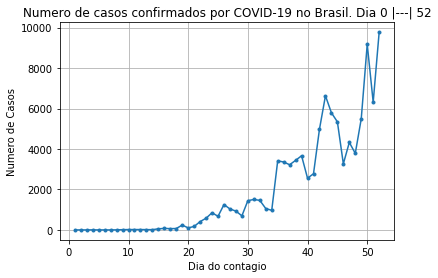

In [73]:
bdBRcases = bdbrasilcases.iloc[:,2:bdbrasilcases.shape[1]]
y = bdBRcases.apply(np.sum,axis = 0)
plt.plot(x,y,marker='.')
plt.title('Número de casos confirmados por COVID-19 no Brasil. Dia 0 |---| {}'.format(max(x)))
plt.xlabel('Dia do contagio')
plt.ylabel('Numero de Casos')
plt.grid(True)

plt.plot(cumulative_cases_br,marker='.')
plt.title('Numero de casos confirmados no Brasil (Acumulado). Dia 0 |---| {}'.format(max(x) - 1))
plt.xlabel('Dia do Contagio')
plt.ylabel('Numero de casos')
plt.grid(True)

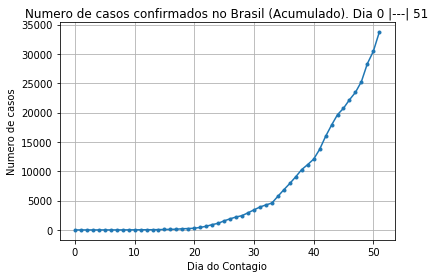

In [74]:
plt.plot(cumulative_cases_br,marker='.')
plt.title('Número de casos confirmados no Brasil (Acumulado). Dia 0 |---| {}'.format(max(x) - 1))
plt.xlabel('Dia do Contagio')
plt.ylabel('Numero de casos')
plt.grid(True)

### Mortes

<module 'matplotlib.pyplot' from '/usr/lib/python3.8/site-packages/matplotlib/pyplot.py'>

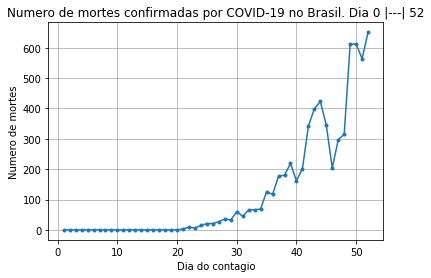

In [75]:
bdBRdeaths = bdbrasildeaths.iloc[:,2:bdbrasildeaths.shape[1]]
y = bdBRdeaths.apply(np.sum,axis = 0)
plt.plot(x,y,marker='.')
plt.title('Número de mortes confirmadas por COVID-19 no Brasil. Dia 0 |---| {}'.format(max(x)))
plt.xlabel('Dia do contagio')
plt.ylabel('Numero de mortes')
plt.grid(True)

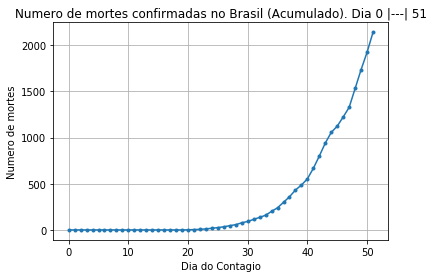

In [76]:
plt.plot(cumulative_deaths_br,marker='.')
plt.title('Número de mortes confirmadas no Brasil (Acumulado). Dia 0 |---| {}'.format(max(x) - 1))
plt.xlabel('Dia do Contagio')
plt.ylabel('Numero de mortes')
plt.grid(True)

## Nordeste

### Casos

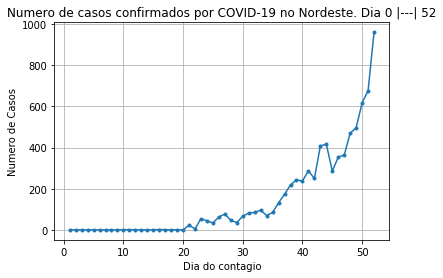

In [77]:

bdNE = bdbrasilcases.loc[bdbrasilcases.iloc[:,0] == 'Nordeste',:].iloc[:,2:bdbrasilcases.shape[1]]
y = bdNE.apply(np.sum,axis = 0)
plt.plot(x,y,marker='.')
plt.title('Número de casos confirmados por COVID-19 no Nordeste. Dia 0 |---| {}'.format(max(x)))
plt.xlabel('Dia do contagio')
plt.ylabel('Numero de Casos')
plt.grid(True)


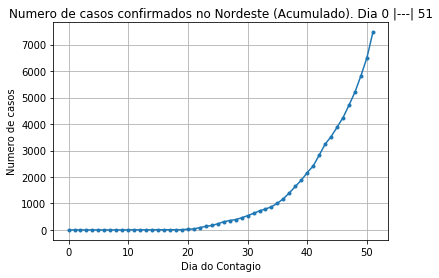

In [78]:
plt.plot(cumulative_cases_NE,marker='.')
plt.title('Número de casos confirmados no Nordeste (Acumulado). Dia 0 |---| {}'.format(max(x) - 1))
plt.xlabel('Dia do Contagio')
plt.ylabel('Numero de casos')
plt.grid(True)

### Mortes

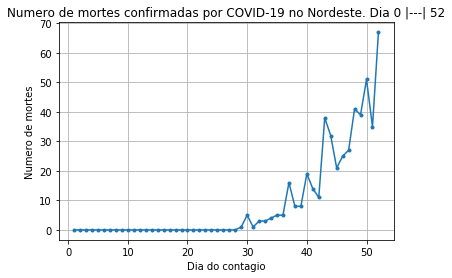

In [79]:
bdNE = bdbrasildeaths.loc[bdbrasildeaths.iloc[:,0] == 'Nordeste',:].iloc[:,2:bdbrasildeaths.shape[1]]
y = bdNE.apply(np.sum,axis = 0)
plt.plot(x,y,marker='.')
plt.title('Número de mortes confirmadas por COVID-19 no Nordeste. Dia 0 |---| {}'.format(max(x)))
plt.xlabel('Dia do contagio')
plt.ylabel('Numero de mortes')
plt.grid(True)


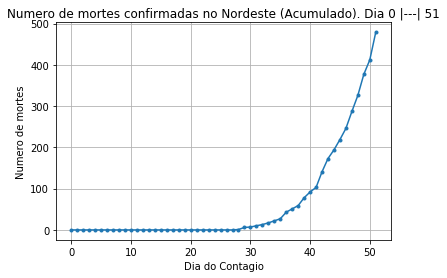

In [80]:
plt.plot(cumulative_deaths_NE,marker='.')
plt.title('Número de mortes confirmadas no Nordeste (Acumulado). Dia 0 |---| {}'.format(max(x) - 1))
plt.xlabel('Dia do Contagio')
plt.ylabel('Numero de mortes')
plt.grid(True)

## São Paulo 

### Casos

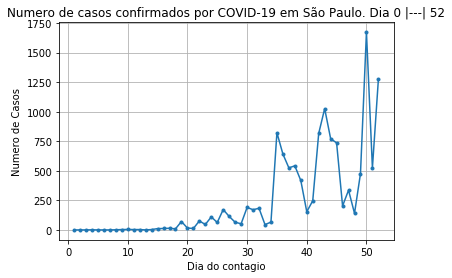

In [81]:
bdSP = bdbrasilcases.loc[bdbrasilcases.iloc[:,0] == 'São Paulo',:].iloc[:,2:bdbrasilcases.shape[1]]
y = bdSP.apply(np.sum,axis = 0)
plt.plot(x,y,marker='.')
plt.title('Número de casos confirmados por COVID-19 em São Paulo. Dia 0 |---| {}'.format(max(x)))
plt.xlabel('Dia do contagio')
plt.ylabel('Numero de Casos')
plt.grid(True)


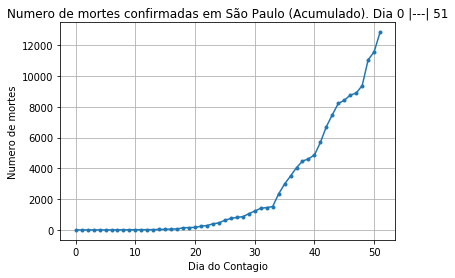

In [82]:
plt.plot(cumulative_cases_SP,marker='.')
plt.title('Número de mortes confirmadas em São Paulo (Acumulado). Dia 0 |---| {}'.format(max(x) - 1))
plt.xlabel('Dia do Contagio')
plt.ylabel('Numero de mortes')
plt.grid(True)

### Mortes

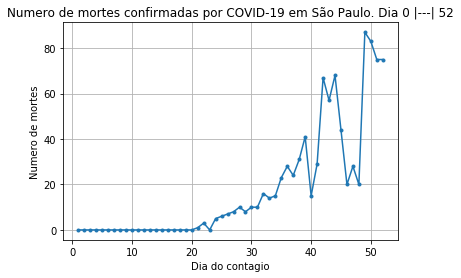

In [83]:
bdSP = bdbrasildeaths.loc[bdbrasildeaths.iloc[:,0] == 'São Paulo',:].iloc[:,2:bdbrasildeaths.shape[1]]
y = bdSP.apply(np.sum,axis = 0)
plt.plot(x,y,marker='.')
plt.title('Número de mortes confirmadas por COVID-19 em São Paulo. Dia 0 |---| {}'.format(max(x)))
plt.xlabel('Dia do contagio')
plt.ylabel('Numero de mortes')
plt.grid(True)


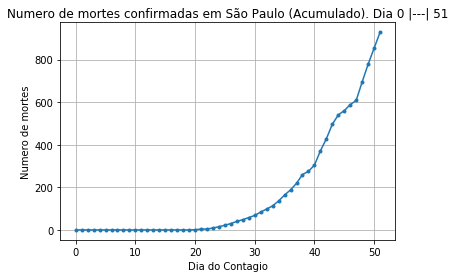

In [84]:
plt.plot(cumulative_deaths_SP,marker='.')
plt.title('Número de mortes confirmadas em São Paulo (Acumulado). Dia 0 |---| {}'.format(max(x) - 1))
plt.xlabel('Dia do Contagio')
plt.ylabel('Numero de mortes')
plt.grid(True)

# Brasil // São Paulo // Nordeste 

## Casos

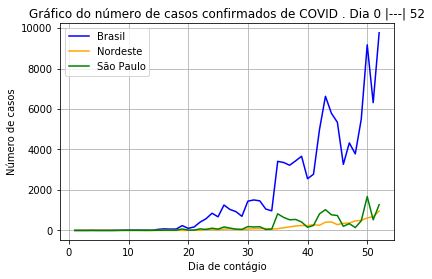

In [85]:
bdBRcases = bdbrasilcases.iloc[:,2:bdbrasilcases.shape[1]]
bdNE = bdbrasilcases.loc[bdbrasilcases.iloc[:,0] == 'Nordeste',:].iloc[:,2:bdbrasilcases.shape[1]]
bdSP = bdbrasilcases.loc[bdbrasilcases.iloc[:,0] == 'São Paulo',:].iloc[:,2:bdbrasilcases.shape[1]]

yBR = bdBRcases.apply(np.sum,axis = 0)
yNE = bdNE.apply(np.sum,axis = 0)
ySP = bdSP.apply(np.sum,axis = 0)
yBR.shape, yNE.shape, ySP.shape

plt.plot(x,yBR, c = 'blue', label = 'Brasil')
plt.plot(x,yNE, c = 'Orange', label = 'Nordeste')
plt.plot(x,ySP, c = 'Green',label = 'São Paulo')

plt.title('Número de casos confirmados de COVID . Dia 0 |---| {}'.format(max(x)))

plt.xlabel('Dia de contágio')
plt.ylabel('Número de casos')

plt.legend()
plt.grid(True)

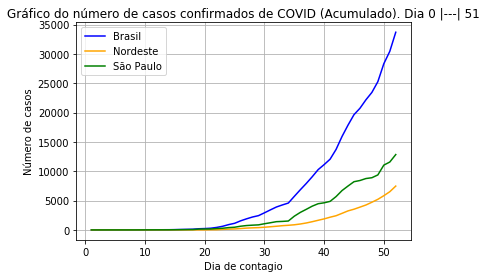

In [86]:
plt.plot(x,cumulative_cases_br, c = 'blue', label = 'Brasil')
plt.plot(x,cumulative_cases_NE, c = 'Orange', label = 'Nordeste')
plt.plot(x,cumulative_cases_SP, c = 'Green',label = 'São Paulo')

plt.title('Número de casos confirmados de COVID (Acumulado). Dia 0 |---| {}'.format(max(x) - 1))

plt.xlabel('Dia de contagio')
plt.ylabel('Número de casos')

plt.legend()
plt.grid(True)

## Mortes

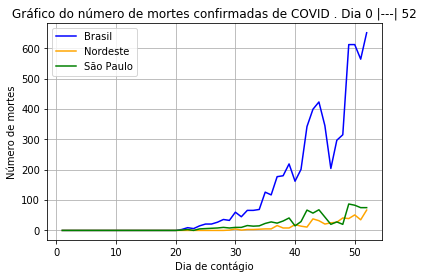

In [108]:
bdBRdeaths = bdbrasildeaths.iloc[:,2:bdbrasildeaths.shape[1]]
bdNE = bdbrasildeaths.loc[bdbrasildeaths.iloc[:,0] == 'Nordeste',:].iloc[:,2:bdbrasildeaths.shape[1]]
bdSP = bdbrasildeaths.loc[bdbrasildeaths.iloc[:,0] == 'São Paulo',:].iloc[:,2:bdbrasildeaths.shape[1]]

yBR = bdBRdeaths.apply(np.sum,axis = 0)
yNE = bdNE.apply(np.sum,axis = 0)
ySP = bdSP.apply(np.sum,axis = 0)
yBR.shape, yNE.shape, ySP.shape

plt.plot(x,yBR, c = 'blue', label = 'Brasil')
plt.plot(x,yNE, c = 'Orange', label = 'Nordeste')
plt.plot(x,ySP, c = 'Green',label = 'São Paulo')

plt.title('Gráfico do número de mortes confirmadas de COVID . Dia 0 |---| {}'.format(max(x)))

plt.xlabel('Dia de contágio')
plt.ylabel('Número de mortes')

plt.legend()
plt.grid(True)

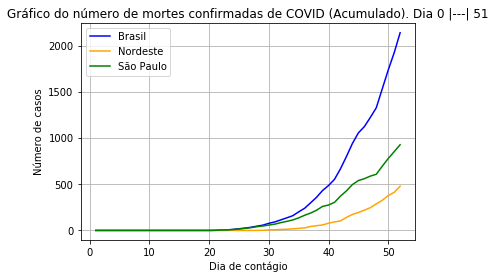

In [100]:
plt.plot(x,cumulative_deaths_br, c = 'blue', label = 'Brasil')
plt.plot(x,cumulative_deaths_NE, c = 'Orange', label = 'Nordeste')
plt.plot(x,cumulative_deaths_SP, c = 'Green',label = 'São Paulo')

plt.title('Número de mortes confirmadas de COVID (Acumulado). Dia 0 |---| {}'.format(max(x) - 1))

plt.xlabel('Dia de contágio')
plt.ylabel('Número de casos')

plt.legend()
plt.grid(True)

# Mundo (Crescimento)

## Casos

In [89]:
pcasesworld = (np.sum(d041720['Confirmed'])/np.sum(d041620['Confirmed']) - 1)*(100)

## Mortes

In [90]:
pdeathsworld = (np.sum(d041720['Deaths'])/np.sum(d041620['Deaths']) - 1)*(100)

# Crescimento Percentual 

In [91]:
print('Crescimento relativo percentual de {} de {}'.format(day - 1, month), 'Para {} de {}'.format(day,month))

dfp = {
    'Situation ': ['Death','Confirmed'],
    'Mundo': [pdeathsworld,pcasesworld],
    'Brasil': [pdeathsbr,pcasesbr],
    'São Paulo': [pdeathsSP,pcasesSP],
    'Nordeste': [pdeathsNE,pcasesNE]
}

pd.DataFrame(dfp)

Crescimento relativo percentual de 17 de abril Para 18 de abril


,Situation,Mundo,Brasil,São Paulo,Nordeste
0,Death,6.968658,11.278586,8.792497,16.262136
1,Confirmed,4.066807,10.705364,11.005447,14.766441


# Tabela de Estimativas 

## Casos 

In [92]:
dfestcases = {
    'Situation': ['True','Estimate','Ratio'],
    'Brazil': [cumulative_cases_br[len(cumulative_cases_br)-1],estcasesBR,estcasesBR/cumulative_cases_br[len(cumulative_cases_br)-1]],
    'Nordeste':[cumulative_cases_NE[len(cumulative_cases_NE)-1],estcasesNE,estcasesNE/cumulative_cases_NE[len(cumulative_cases_NE)-1]],    'São Paulo':[cumulative_cases_SP[len(cumulative_cases_SP)-1],estcasesSP,estcasesSP/cumulative_cases_SP[len(cumulative_cases_SP)-1]]
}

print('Tabela de comparação , estimativas verdadeiros valores . Casos Acumulados - {} de {}'.format(day, month))
pd.DataFrame(dfestcases)

Tabela de comparação , estimativas verdadeiros valores . Casos Acumulados - 18 de abril


,Situation,Brazil,Nordeste,São Paulo
0,True,33681,7469,12840
1,Estimate,[37293.622017345086],[8576.984163044788],[14253.418932513623]
2,Ratio,[1.107259939352902],[1.1483443785037875],[1.1100793561147682]


## Mortes

In [93]:
dfestdeaths = {
    'Situation': ['True','Estimate','Ratio'],
    'Brazil': [cumulative_deaths_br[len(cumulative_deaths_br)-1],estdeathsBR,estdeathsBR/cumulative_deaths_br[len(cumulative_deaths_br)-1]],
    'Nordeste':[cumulative_deaths_NE[len(cumulative_deaths_NE)-1],estdeathsNE,estdeathsNE/cumulative_deaths_NE[len(cumulative_deaths_NE)-1]], 
    'São Paulo':[cumulative_deaths_SP[len(cumulative_deaths_SP)-1],estdeathsSP,estdeathsSP/cumulative_deaths_SP[len(cumulative_deaths_SP)-1]]
}

print('Tabela de comparação , estimativas verdadeiros valores . Mortes Acumuladas - {} de {}'.format(day, month))
pd.DataFrame(dfestdeaths)

Tabela de comparação , estimativas verdadeiros valores . Mortes Acumuladas - 18 de abril


,Situation,Brazil,Nordeste,São Paulo
0,True,2141,479,928
1,Estimate,[2382.7198455458665],[557.8374122419938],[1009.809715428258]
2,Ratio,[1.1129004416374901],[1.164587499461365],[1.0881570209356228]


# Exemplo de uso : 

 Para estimar para determinado dia , necessita-se de no minimo 2 dias como base, ou no maximo 4 dias.
Para o argumento $R$, voce deve informar o total de casos/mortos no respectivo dia que voce ira informar em $X$. $x$ minusculo será o dia que você quer estimar, e o $p$ será a quantidade de pontos que voce ira querer informar, para ajustar a sua curva.
 
 **Exemplo :**
```Python

coef(R = [100, 570, 900], X = [13,25,32], x = 40, p = 3)

```

Para analisar cada gráfico gerado, é recomendável que rode a seção ***Datasets***.
